# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# cargar archivos

plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')


In [4]:
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [5]:
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [6]:
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [7]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [8]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [10]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [11]:
# cantidad de nulos para users
print(users.isnull().sum(axis=0))
print(users.isnull().mean()*100)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id        0.000
first_name     0.000
last_name      0.000
age            0.000
city          11.725
reg_date       0.000
plan           0.000
churn_date    88.350
dtype: float64


In [12]:
# cantidad de nulos para usage
print(usage.isnull().sum(axis=0))
print(usage.isnull().mean()*100)

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id           0.000
user_id      0.000
type         0.000
date         0.125
duration    55.190
length      44.740
dtype: float64


✍️ **Comentario**: Se presentan valores nulos en las columnas de churn_date 88.3% y en city 11.7% en el data frame de users. Mientras que en el data frame de usage se presentan en las columnas de duration 55.1%, length 44.7% y en date 0.1%. En los casos de las columnas de churn_date se recomienda ignorar los valores nulos para que no afecten los datos. En los casos como date se tiene que modificar las fechas imposibles para que los datos no afecten el análisis de las tendencias. 

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción? Las columnas que tienen valores faltantes son city y churn_date en el dataframe de users. La columna city tiene una proporción de 11.725 y churn_date de 88.350. Por otro lado, en el dataframe de usage, las columnas de duration y lenght tienen faltantes con proporciones de 55.190 y 44.740 respectivamente. Cabe destacar que la columna date de este mismo dataframe también tiene valores faltantes pero es de 0.125. 
- Indica qué harías: ¿imputar, eliminar, ignorar? En el caso de las columnas que tengan muchos valores faltantes, vamos a analizar la posibilidad de ignorar algunos casos. En general, se tratará de no eliminar datos. Aunque si el análisis queda muy sesgado se tomará como última consideración. En los casos en donde falten pocos valores se imputaran o se dejarán nulos. Se tiene que investigar más para saber los casos de cada columna. 

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [13]:
# explorar columnas numéricas de users
columnas_numericas = ['user_id', 'age']
columnas_numericas_users = users[columnas_numericas].describe()
print(columnas_numericas_users)

            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000


- La columna `user_id` tiene 4000 registros una media de 11,999. Una desviación estándar de 1154. Un minímo de 10000 y un máximo de 13,999. 
- La columna `age` tiene outliers se puede ver en el mínimo que muestra de -999. También tiene un promedio de 33.73

In [14]:
# explorar columnas numéricas de usage
columnas_numericas = ['id', 'user_id']
columnas_numericas_usage = usage[columnas_numericas].describe()
print(columnas_numericas_usage)

                id       user_id
count  40000.00000  40000.000000
mean   20000.50000  12002.405975
std    11547.14972   1157.279564
min        1.00000  10000.000000
25%    10000.75000  10996.000000
50%    20000.50000  12013.000000
75%    30000.25000  13005.000000
max    40000.00000  13999.000000


- Las columnas `id` y `user_id`al parecer no tienen outliers fuera de los rangos normales
- Las columnas

In [15]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
columnas_categoricas_users = users [columnas_user].describe()
print (columnas_categoricas_users)

          city    plan
count     3531    4000
unique       7       2
top     Bogotá  Basico
freq       808    2595


- La columna `city` tiene 3531 registros, 7 son únicos y Bogotá aparece como la ciudad más top. 
- La columna `plan` tiene 4000 registros, 2 son únicos y Básico aparece como el plan más top. 

In [16]:
# explorar columna categórica de usage
usage['type'].describe()

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` tiene 40000 registros, dos son únicos. Es de tipo object. Los más frecuentes son de 22092. 


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  No se encontraron valores inválidos 
- ¿Qué acción tomarías?  

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [17]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [18]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'])

In [19]:
# Revisar los años presentes en `reg_date` de users
users ['reg_date'].describe()

count                    4000
unique                   3961
top       2026-05-10 00:00:00
freq                       40
first     2022-01-01 00:00:00
last      2026-05-10 00:00:00
Name: reg_date, dtype: object

En `reg_date`, se observan 4000 registros de los cuales únicos hay 3961, la fecha top es 2026-05-10. La más frecuentae es 40.
La primera fecha es 2022-01-01 y la última fecha es 2026-05-10. Claramente se puede observar que es una fecha imposible ya que esa fecha aún no ha transcurrido. 

In [20]:
# Revisar los años presentes en `date` de usage
usage ['date'].describe()

count                             39950
unique                            39950
top       2024-06-16 13:26:59.770494262
freq                                  1
first               2024-01-01 00:00:00
last                2024-06-30 00:00:00
Name: date, dtype: object

En `date`, se observan registros de 39950, la fecha top es 2024-03-10. Los tipos de datos son object.   
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)Aparece el año de 2026-05-01 que todavía no transcurre.
- 
- ¿Qué harías con ellas? Reemplazarlas por NA o también se puede acercar al último valor antes de los outliers. 

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [21]:

# Reemplazar -999 por la mediana de age
age_media = users[users['age'] != -999]['age'].median()

# Verificar cambiosana = ...
users['age'] = users['age'].replace(-999, age_media)

users['age'].describe()


count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [22]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [23]:


# Marcar fechas futuras como NA para reg_date
# Definir la fecha actual
fecha_actual = pd.Timestamp.now()
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users.loc[users['reg_date'] > fecha_actual, 'reg_date'] = pd.NaT

# Verificar cambios
users['reg_date'].describe()



count                              3960
unique                             3960
top       2024-06-27 06:08:22.325581392
freq                                  1
first               2022-01-01 00:00:00
last                2024-12-31 00:00:00
Name: reg_date, dtype: object

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [24]:


# Verificación MAR en usage (Missing At Random) para duration
usage['duration'].isna().groupby(usage['type']).mean().sort_values(ascending=False)



type
text    0.999276
call    0.000000
Name: duration, dtype: float64

In [25]:
# Verificación MAR en usage (Missing At Random) para length
usage['length'].isna().groupby(usage['type']).mean().sort_values(ascending=False)

type
call    0.99933
text    0.00000
Name: length, dtype: float64

En la columna duration hay 99 % de faltantes en text. Mientras que en length en call hay 99% de faltantes. 

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [26]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg(
    cant_mensajes=('is_text', 'sum'),
    cant_llamadas=('is_call', 'sum'),
    cant_minutos_llamada=('duration', 'sum') 
).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'cant_mensajes': 'total_mensajes',
    'cant_llamadas': 'total_llamadas', 
    'cant_minutos_llamada': 'minutos_totales'
})
# observar resultado
usage_agg.head(3)

,user_id,total_mensajes,total_llamadas,minutos_totales
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [28]:

# Combinar la tabla agregada con el dataset de usuarios
user_profile = usage_agg.merge(users, on= 'user_id')
user_profile.head(5)


,user_id,total_mensajes,total_llamadas,minutos_totales,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [29]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()

,user_id,total_mensajes,total_llamadas,minutos_totales,age
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,11999.729432,5.524381,4.478120,23.317054,48.138285
std,1154.898108,2.358416,2.144238,18.168095,17.691541
min,10000.000000,0.000000,0.000000,0.000000,18.000000
25%,10999.500000,4.000000,3.000000,11.120000,33.000000
50%,12000.000000,5.000000,4.000000,19.780000,48.000000
75%,12999.500000,7.000000,6.000000,31.415000,63.000000
max,13999.000000,17.000000,15.000000,155.690000,79.000000


In [30]:
# Distribución porcentual del tipo de plan
plan_distribution = user_profile['plan'].value_counts()
plan_percentage = user_profile['plan'].value_counts(normalize=True) * 100


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

💡Insights: Dentro del plan Premium, hay una menor proporción de clientes, mientras que en el plan Básico se concentran la mayoría de los clientes, casi por 300. 
- Distribución la distribución que presenta la gráfica es sesgada ligeramente hacia la izquierda. La mayoría de los clientes se concentran en las edades de 45 años. 

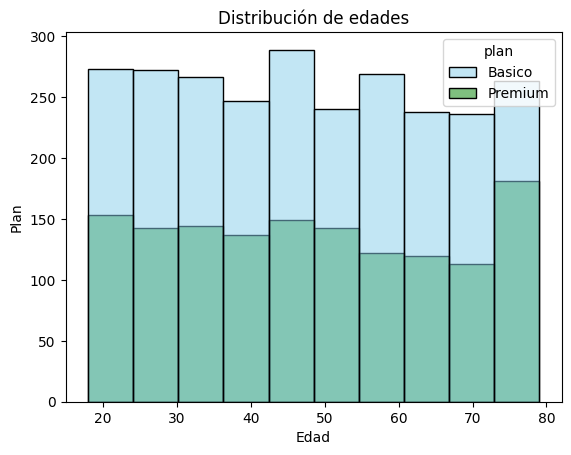

In [31]:

# Histograma para visualizar la edad (age)
sns.histplot(user_profile, x='age', hue='plan', bins=10,
            palette=['skyblue', 'green'])
plt.xlabel('Edad')
plt.ylabel('Plan')
plt.title('Distribución de edades')

plt.show()

💡Insights: 
- ....

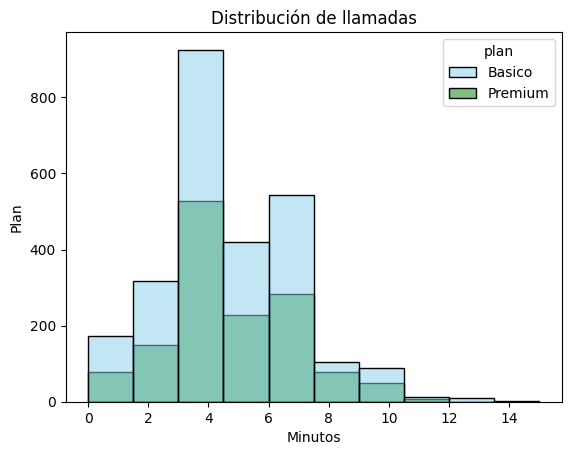

In [32]:
# Histograma para visualizar la cant_llamadas
sns.histplot(user_profile, x='total_llamadas', hue='plan', bins=10,
            palette=['skyblue', 'green'])
plt.xlabel('Minutos')
plt.ylabel('Plan')
plt.title('Distribución de llamadas')

plt.show()

💡Insights: La mayor proporción de usuarios con plan Básico tienden a hacer más llamadas
- Distribución se presenta sesgada hacia la izquierda, en dónde se observa que se concentra la cantidad de llamadas en 4 minutos en su mayoría en el plan básico

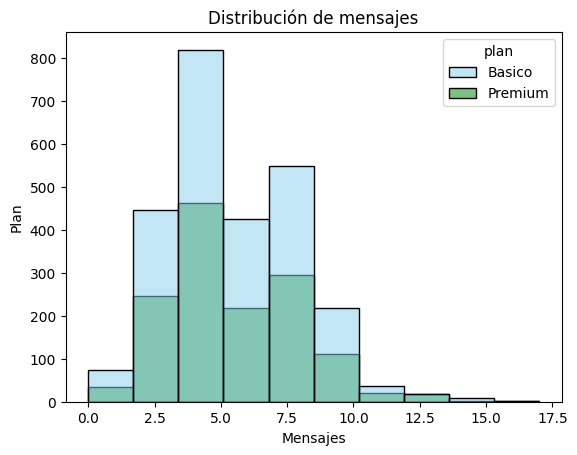

In [33]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(user_profile, x='total_mensajes', hue='plan', bins=10, 
            palette=['skyblue', 'green'])
plt.xlabel('Mensajes')
plt.ylabel('Plan')
plt.title('Distribución de mensajes')

plt.show()

💡Insights: La mayor proporción de mensajes se ubica entre 3 y cuatro mensajes dentro de los planes básicos. 
- La Distribución está sesgada a la izquierda. 

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

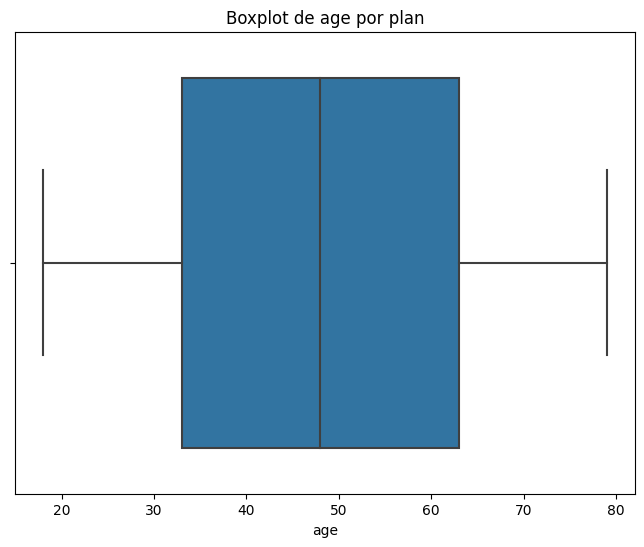

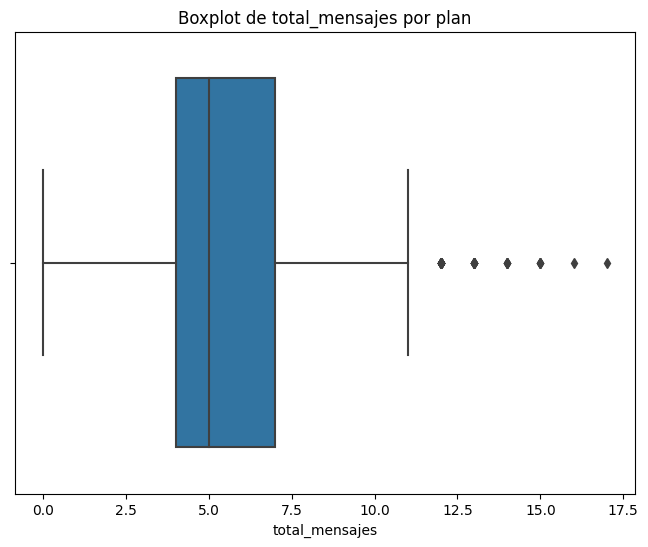

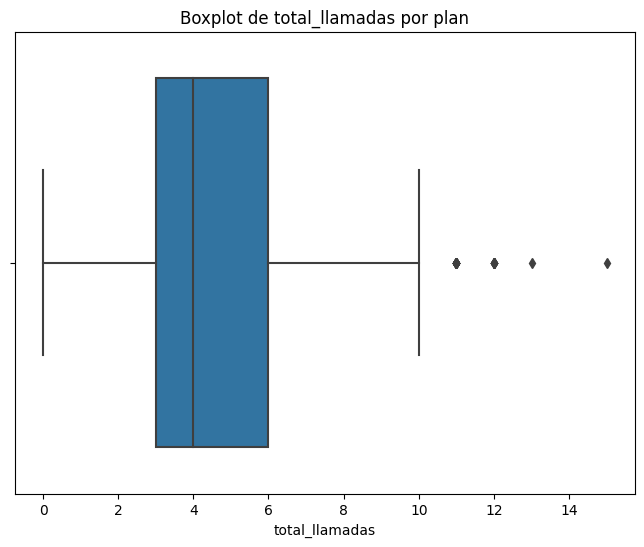

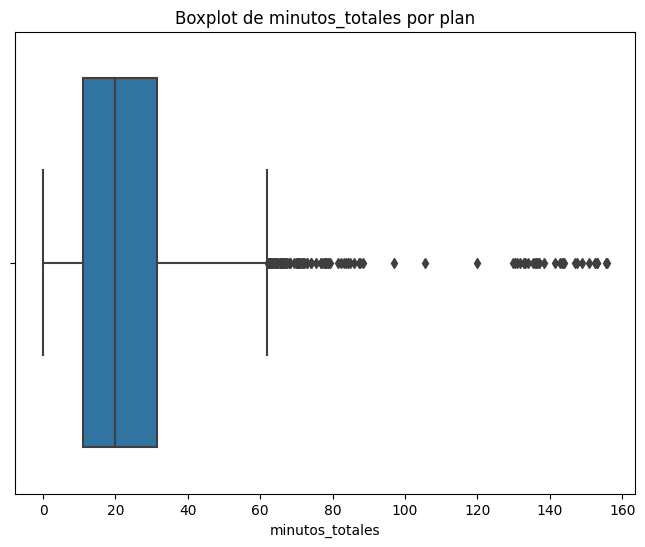

In [34]:

# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'total_mensajes', 'total_llamadas', 'minutos_totales']
for col in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=user_profile, x=col, hue='plan')
    plt.title(f'Boxplot de {col} por plan')
    plt.show()



💡Insights: 
- Age: ...(presenta o no outliers) La columna age no presenta outliers en la gráfica del boxplot 
- cant_mensajes: presenta outliers a partir de 11 aproximadamente
- cant_llamadas: presenta outliers después de 10
- cant_minutos_llamada: presenta outliers después de 60

In [35]:
# Calcular límites con el método IQR
columnas_limites = ['total_mensajes', 'total_llamadas', 'minutos_totales']
for col in columnas_limites:
    print(f"\n--- Análisis de {col} ---")
    Q1 = user_profile[col].quantile(0.25)  # Primer cuartil
    Q2 = user_profile[col].quantile(0.50)  # Segundo cuartil o mediana  
    Q3 = user_profile[col].quantile(0.75)  # Tercer cuartil
    
    # Calcular IQR y límites para outliers
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    print(f"Q1: {Q1}")
    print(f"Q2 (Mediana): {Q2}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Límite inferior: {limite_inferior}")
    print(f"Límite superior: {limite_superior}")





--- Análisis de total_mensajes ---
Q1: 4.0
Q2 (Mediana): 5.0
Q3: 7.0
IQR: 3.0
Límite inferior: -0.5
Límite superior: 11.5

--- Análisis de total_llamadas ---
Q1: 3.0
Q2 (Mediana): 4.0
Q3: 6.0
IQR: 3.0
Límite inferior: -1.5
Límite superior: 10.5

--- Análisis de minutos_totales ---
Q1: 11.12
Q2 (Mediana): 19.78
Q3: 31.415
IQR: 20.295
Límite inferior: -19.322500000000005
Límite superior: 61.8575


In [36]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,total_mensajes,total_llamadas,minutos_totales
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Se mantienen los outliers ya que la diferencia entre el úlimo cuarto y el máximo no es tan grande de 7 a 17. 
- cant_llamadas: mantener o no outliers, porqué? Se mantienen los outliers ya que la diferencia es todavía menor respecto al último cuartil al máximo. 
- cant_minutos_llamada: mantener o no outliers, porqué? A pesar de que la diferencia es todavía mayor, sin embargo, quitar los outliers podría modificar mucho el análisis por eso en este caso también se mantienen. 

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [37]:
# Crear columna grupo_uso

user_profile['grupo_uso'] = 'Alto uso'  # Valor por defecto

# Asignar 'Uso medio' cuando llamadas < 10 y mensajes < 10
user_profile.loc[(user_profile['total_llamadas'] < 10) & (user_profile['total_mensajes'] < 10), 'grupo_uso'] = 'Uso medio'

# Asignar 'Bajo uso' cuando llamadas < 5 y mensajes < 5 (sobrescribe a 'Uso medio' cuando corresponda)
user_profile.loc[(user_profile['total_llamadas'] < 5) & (user_profile['total_mensajes'] < 5), 'grupo_uso'] = 'Bajo uso'

In [38]:
# verificar cambios
user_profile.head()

,user_id,total_mensajes,total_llamadas,minutos_totales,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [39]:
# Crear columna grupo_edad
import numpy as np
user_profile['grupo_edad'] = np.where(user_profile['age'] < 30, 'Joven',
                                    np.where(user_profile['age'] < 60, 'Adulto', 'Adulto Mayor'))


In [40]:
# verificar cambios
user_profile.head()

,user_id,total_mensajes,total_llamadas,minutos_totales,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso,grupo_edad
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio,Adulto
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso,Adulto
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio,Adulto
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso,Adulto Mayor
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

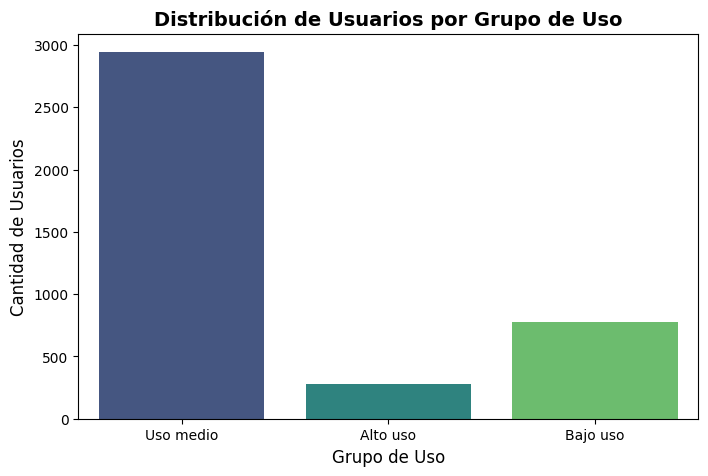

In [41]:
# Visualización de los segmentos por uso

plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x='grupo_uso', palette='viridis')
plt.title('Distribución de Usuarios por Grupo de Uso', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Uso', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)
plt.show()


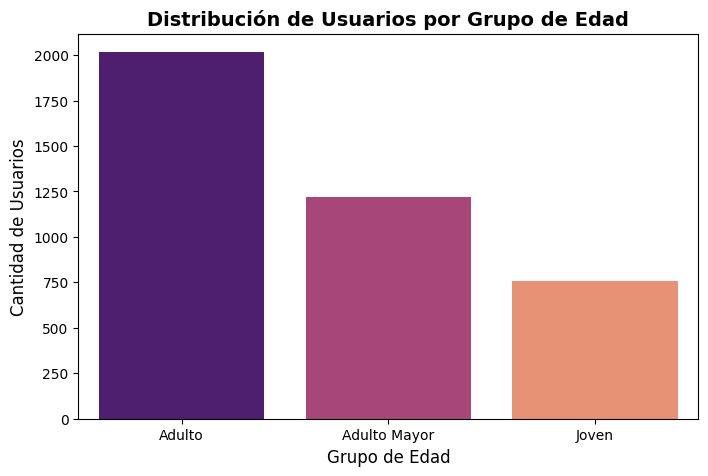

In [42]:
# Visualización de los segmentos por edad
plt.figure(figsize=(8, 5))
sns.countplot(data=user_profile, x='grupo_edad', palette='magma')
plt.title('Distribución de Usuarios por Grupo de Edad', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
Los datos presentaban un datos nulos en los dataframe de users y usage. Principalmente las columnas de 'churn_date' con 88.3%, 'city' con 11.7% del dataframe de users. En el dataframe de usage, las columnas que presentaban nulos eran 'duration' con 55.1%, length con 44.7% y date con 0.1%, respectivamente. 

- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  Principalmente están los segmentos de edad y de uso. En primer lugar se puede destacar que hay una mayor cantidad de clientes que se encuentra en el grupo de uso, en el uso medio, más de 2500. Por otro lado, en el grupo de edad se puede observar que el grupo adulto es decír, los que se encuentran en la edad de mayor de 30 y menor que 60 son los clientes que tienen mayor cantidad de usuarios, casi 2000. 
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué? Los segmentos que son más valiosos para ConnectaTel se encuentran en los grupos de uso y de edad porque ahí se pueden destacar los usuarios que hacen mayor o menor uso de las llamadas o mensajes, en este caso se puede observar como el grupo de edad de los Adultos mayores a 30 años y menores a 60 años son los que mayor uso de llamadas y mensajes hacen, así como también el uso que se hace, en este caso el uso medio es el que resalta más. Cabe destacar que los jóvenes son los que menor uso hacen de las llamadas y mensajes. También es necesario destacar que el "Alto uso" es el que menor proporción tiene con menos de 500 usuarios. 
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
Para empezar en la columna 'age' aparecen valores extremos u outliers como -999 que claramente son errores que se dieron en el registro. 
También en la columna 'date' se encuentran fechas imposibles u outliers que se presentan fuera del rango del periodo de los dataframe. Este tipo de outliers no representan algo muy significativo al negocio sin embargo, si no se hubieran corregido modificarían mucho las tendencias en los clientes. 
- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?
Se tiene que mejorar las ofertas en los planes básicos ya que son los que mayor uso tienen en llamadas o mensajes de los clientes. También se tienen que hacer mejoras en el grupo de edad de clientes "Adulto" que se encuentran en la edad de mayor a 30 y menor que 60 ya que son los que mayor uso de llamadas y mensajes hacen. Al igual que en el segmento de uso, se tienen que hacer mejoras en el servicio de uso medio que es el que mayor proporción de clientes tiene. 
✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- abc Se presentan valores nulos en los dataframe de users y usage. en las columnas de 'churn_date' y 'city' en users. Mientras que en usage se presentaron valores nulos en 'duration', 'length' y 'date'. Cabe mencionar que la columna 'age' también presentaba outliers, edades imposibles como -999. 
- abc Se recomienda ignorar los casos más altos que pasan por arriba del 80 por ciento e investigar que pasó con los casos que rondan entre el 5% al 30 % para decidir que se puede hacer en esos casos. 


🔍 **Segmentos por Edad**
- abc Se puede destacar que el grupo Adulto, que ronda más de 30 años y menos de 60 años, es el grupo más activo en el uso de servicios móviles de llamadas y mensajes. El grupo menos activo, en el uso de estos servicios es el de los jóvenes, menores de 30 años. 
- abc Se recomienda mejorar planes en este grupo de edades para incentivar más el uso de estos servicios y se pueda fortalecer el negocio con este tipo de clientes. 


📊 **Segmentos por Nivel de Uso**
- abc Se puede destacar que el nivel de uso más utilizado es el "uso medio" entre los clientes. Cabe señalar que el uso alto es el que menos se utiliza por los clientes. 
- abc Se recomienda hacer mejoras en el uso medio para los clientes.


➡️ Esto sugiere que los clientes que están en edades de mayores a 30 años y menores a 60 años son los que más hacen uso de los servicios móviles que son llamadas y mensajes. También que el mayor uso es el medio en los clientes. Cabe señalar que el plan básico es el más utilizado entre los clientes. 


💡 **Recomendaciones**
- abc Dar priodidad a los clientes en edades de más de 30 años y menores de 60 años para ofrecer más ofertas a este tipo de clientes que son la mayor proporción. También se podría mejorar las ofertas a los clientes que tienen menos proporción que son los de menos de 30 años para que se pueda ganar clientela en ese sector de la población. 
- abc Dar prioridad a los servicios de uso medio porque es la tendencia que tiene mayor proporción en el negocio de ConnetaTel. Así cómo también en el plan básico. 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`